# Rejection Sampling

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats, optimize, interpolate
from random import uniform

In [12]:
def gauss(x,mu,sigma,A = 1):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)


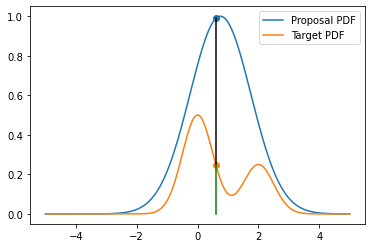

In [51]:

plt.plot(np.linspace(-5, 5, 1000), [gauss(i, 0.75, 1) for i in np.linspace(-5, 5, 1000)], label = "Proposal PDF")
plt.plot(np.linspace(-5, 5, 1000), [bimodal(i, 0, 0.5, 0.5, 2, 0.5, 0.25) for i in np.linspace(-5, 5, 1000)], label = "Target PDF", c = "C1")

r = np.random.normal(0.75, 1) 
plt.scatter(r, gauss(r, 0.75, 1))
plt.scatter(r, bimodal(r, 0, 0.5, 0.5, 2, 0.5, 0.25))
plt.plot([r,r],  [gauss(r, 0.75, 1), bimodal(r, 0, 0.5, 0.5, 2, 0.5, 0.25)], c = "black")
plt.plot([r,r],  [0, bimodal(r, 0, 0.5, 0.5, 2, 0.5, 0.25)], c = "green")
plt.legend()


In [39]:
def rejection_sampler(N):
    l = []
    for i in range(N):
        r = np.random.normal(0.75, 1) 
        choice = uniform(0, gauss(r, 0.75, 1))
        if choice < bimodal(r, 0, 0.5, 0.5, 2, 0.5, 0.25):
            l.append(r)
            
    return(l)

In [40]:
l = rejection_sampler(50000)

In [47]:
counts, bins = np.histogram(l, 41)

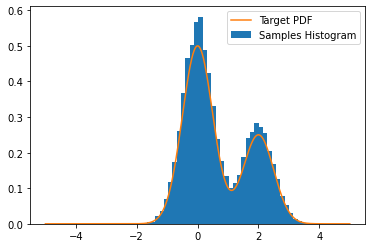

In [53]:
plt.hist(bins[:-1], bins, weights = counts / 2500, label = "Samples Histogram")
# plt.plot(np.linspace(-5, 5, 1000), [gauss(i, 0.75, 1) for i in np.linspace(-5, 5, 1000)], label = "Proposal PDF")
plt.plot(np.linspace(-5, 5, 1000), [bimodal(i, 0, 0.5, 0.5, 2, 0.5, 0.25) for i in np.linspace(-5, 5, 1000)], label = "Target PDF")
plt.legend()

In [54]:
len(l)

18762